# Classification of Epileptical Seizures from EEG signals using Deep Learning



In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation , LSTM , Dropout , AveragePooling3D
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# Data Preprocessing

In [2]:
df=pd.read_csv('data.csv')
df.head(20)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5
5,X14.V1.56,55,28,18,16,16,19,25,40,52,...,-12,-31,-42,-54,-60,-64,-60,-56,-55,5
6,X3.V1.191,-55,-9,52,111,135,129,103,72,37,...,-125,-99,-79,-62,-41,-26,11,67,128,4
7,X11.V1.273,1,-2,-8,-11,-12,-17,-15,-16,-18,...,-79,-91,-97,-88,-76,-72,-66,-57,-39,2
8,X19.V1.874,-278,-246,-215,-191,-177,-167,-157,-139,-118,...,-400,-379,-336,-281,-226,-174,-125,-79,-40,1
9,X3.V1.491,8,15,13,3,-6,-8,-5,4,25,...,49,31,11,-5,-17,-19,-15,-15,-11,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


<ipython-input-4-ecc071a1139e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt[tgt>1]=0


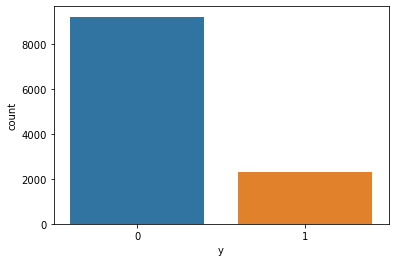

In [4]:
cols = df.columns
tgt = df.y
tgt.unique()
tgt[tgt>1]=0
ax = sns.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [6]:
# X=X[:,1:-1]

In [7]:
df.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
             ..
X175          0
X176          0
X177          0
X178          0
y             0
Length: 180, dtype: int64

In [8]:
X = df.iloc[:,1:179].values
X.shape

(11500, 178)

In [9]:
y = df.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

#  Intuition of the Epileptical Signal In the Dataset 

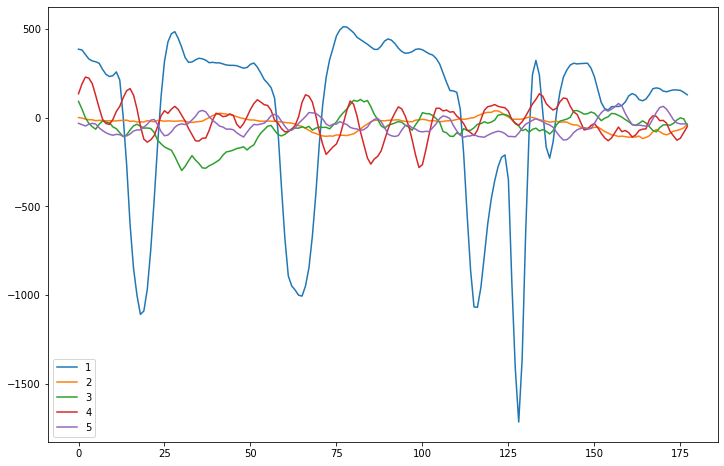

In [10]:
plt.figure(figsize=(12,8))
plt.plot(X[1,:],label='1')
plt.plot(X[7,:],label='2')
plt.plot(X[12,:],label='3')
plt.plot(X[0,:],label='4')
plt.plot(X[2,:],label='5')
plt.legend()
plt.show()

## Preprocessing

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
x = scaler.transform(X)
from keras.utils import to_categorical
y = to_categorical(y)
y

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [13]:
x_train = np.reshape(x_train, (x_train.shape[0],1,X.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0],1,X.shape[1]))

# Creating LSTM Neural Network For the Classification 

In [27]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
tf.keras.backend.clear_session()

model = Sequential()
model.add(LSTM(128, input_shape=(1,178),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64,activation="sigmoid"))
model.add(Dropout(0.5))
# model.add(LSTM(100,return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(50))
# model.add(Dropout(0.2))
model.add(Dense(2, activation='sigmoid'))
from keras.optimizers import SGD
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            157184    
_________________________________________________________________
dropout (Dropout)            (None, 1, 128)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 130       
Total params: 206,722
Trainable params: 206,722
Non-trainable params: 0
_________________________________________________________________


In [17]:
history = model.fit(x_train, y_train, epochs = 100, validation_data= (x_test, y_test))
score, acc = model.evaluate(x_test, y_test)

Epoch 1/100
288/288 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.8688 - val_loss: 0.3398 - val_accuracy: 0.8670
Epoch 2/100
288/288 [==============================] - 1s 2ms/step - loss: 0.3404 - accuracy: 0.8714 - val_loss: 0.3467 - val_accuracy: 0.8639
Epoch 3/100
288/288 [==============================] - 1s 2ms/step - loss: 0.3317 - accuracy: 0.8748 - val_loss: 0.3363 - val_accuracy: 0.8717
Epoch 4/100
288/288 [==============================] - 1s 2ms/step - loss: 0.3292 - accuracy: 0.8761 - val_loss: 0.3402 - val_accuracy: 0.8700
Epoch 5/100
288/288 [==============================] - 1s 2ms/step - loss: 0.3204 - accuracy: 0.8818 - val_loss: 0.3369 - val_accuracy: 0.8717
Epoch 6/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3231 - accuracy: 0.8836 - val_loss: 0.3330 - val_accuracy: 0.8735
Epoch 7/100
288/288 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.8803 - val_loss: 0.3303 - val_accuracy: 0.8735

Epoch 58/100
288/288 [==============================] - 1s 2ms/step - loss: 0.3289 - accuracy: 0.8866 - val_loss: 0.3466 - val_accuracy: 0.8739
Epoch 59/100
288/288 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.8898 - val_loss: 0.3408 - val_accuracy: 0.8722
Epoch 60/100
288/288 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.8874 - val_loss: 0.3411 - val_accuracy: 0.8743
Epoch 61/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3215 - accuracy: 0.8903 - val_loss: 0.3452 - val_accuracy: 0.8761
Epoch 62/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3231 - accuracy: 0.8908 - val_loss: 0.3494 - val_accuracy: 0.8730
Epoch 63/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3246 - accuracy: 0.8868 - val_loss: 0.3525 - val_accuracy: 0.8704
Epoch 64/100
288/288 [==============================] - 1s 3ms/step - loss: 0.3298 - accuracy: 0.8862 - val_loss: 0.3501 - val_accuracy:

In [18]:
from sklearn.metrics import accuracy_score
pred = model.predict(x_test)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y_test,axis=1)
print(expected_classes.shape)
print(predict_classes.shape)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")

(2300,)
(2300,)
Training Accuracy: 0.8726086956521739


# Saving The Trained Model

In [19]:
model.save('Epilepsy.h5')

# Visualisations

Graph Between Training Loss and Training Accuracy

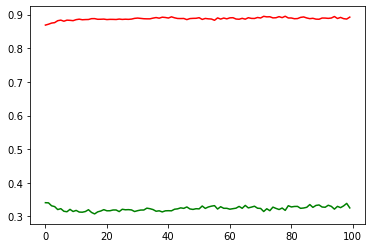

In [24]:
plt.figure(0)
plt.plot(history.history['loss'],'g')
plt.plot(history.history['accuracy'],'r')
plt.show()

Graph Between Validation Loss Function and Validation Accuracy

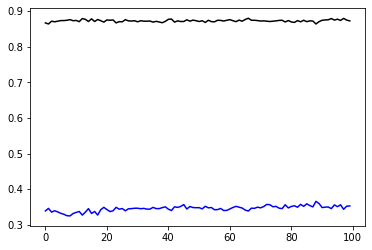

In [25]:
plt.figure(0)
plt.plot(history.history['val_loss'],'b')
plt.plot(history.history['val_accuracy'],'black')
plt.show()
